**MS_986 Group 11:**

Group names:
Ting-Chun Huang - 202369310
Ahmed Khaled Ibrahim - 202356459
Dehao Liu - 202367244
Michael Werner Mpiri - 202350903

**Classification prediction:**
This notebook aims to analyze a dataset from spotify one of the biggest data repository in terms of songs for the world’s music industry. We are going to analyze with intention to predict the top genre that a song belongs to. There are several independent variables in the dataset and we will step by step explain how we approached our attempt and finally got to our prediction accuracy.

Reading our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dfc = pd.read_csv('CS98XClassificationTrain.csv', encoding='ISO-8859-1')

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

Preprocessing data: Dropping of columns and missing values - here we dropped two columns, the id and title column. We went on also to drop missing values since after several testing of different models, we realised they impact our model performance.

In [3]:
dfc = dfc.drop(dfc.columns[[0,1]], axis = 1)

In [4]:
dfc = dfc.dropna()
dfc.reset_index(drop=True, inplace = True)

Visualising our data:

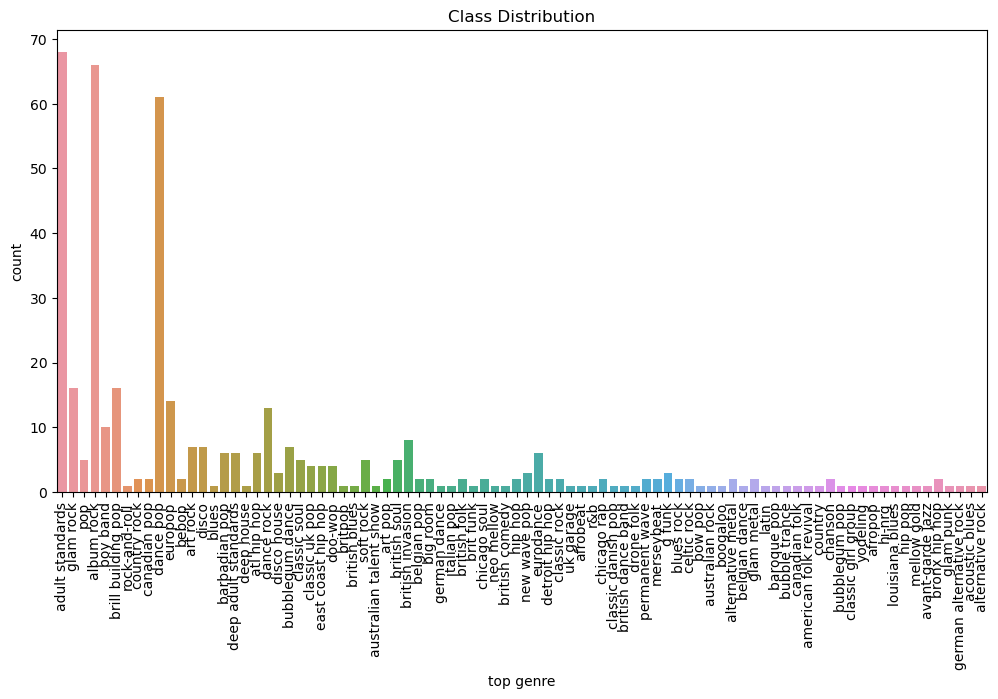

In [5]:
plt.figure(figsize=(12, 6))  
sns.countplot(x='top genre', data=dfc, dodge = True)
plt.title('Class Distribution')
plt.xticks(rotation=90) 
plt.show()

C:\Users\Michael\AppData\Local\Temp\ipykernel_5640\2785388031.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfc.corr()


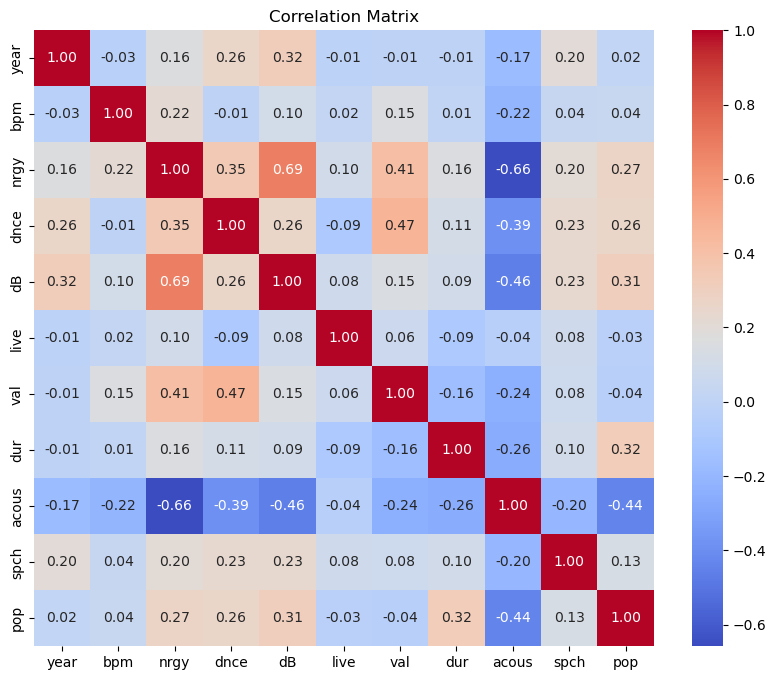

In [6]:
#Correlation matrix is performed to obtain an insight into correlation between features which will help us in feature selection
correlation_matrix = dfc.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Preprocessing data: To prepare our data for our model, we transformed the 'artist' column from categorical variables to numerical variables using the one hot encoding method. In the course of preprocessing our data we tried to group the 'year' column into decade then transform into numerical variables by using label encoding but it didnt work as they was no significant impact to our model accuracy. We also tried to transform the 'title' column from categorical variables to numerical variables but we found out it had no impact on our accuracy that is why we dropped it in preprocessing.

In [7]:
onehot_encoder = OneHotEncoder(sparse=False)  

artist_onehot_encoded = onehot_encoder.fit_transform(dfc[['artist']])
 

artist_onehot_encoded_df = pd.DataFrame(artist_onehot_encoded, columns=onehot_encoder.get_feature_names_out(['artist']))

C:\Users\Michael\.ms-ad\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
dfc = dfc.join(artist_onehot_encoded_df, lsuffix='_original', rsuffix='_onehot')
dfc = dfc.drop('artist', axis = 1)

Preprocessing: Scaling of features (independent numerical variables) is performed inorder to standardize our variables, this is done to ensure the larger scale of certain variable does not prevail over the other features and hence a balance to the machine learning.

In [9]:
numeric_features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

scaler = StandardScaler()
dfc[numeric_features] = scaler.fit_transform(dfc[numeric_features])

Machine learning.
The aim being predicting the top genre of a song from the dataset provided. Here we go on to split our dataset into independent variable and the dependent (target variable). We further go on to split into training and test set for both of the variables in order to prepare for modelling to various techniques. 

In [10]:
X = dfc.drop('top genre', axis=1)  
y = dfc['top genre']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelling. Implementation of a stacked ensemble model, involves combining of multiple base learners (Geron A.,2022). The combination of multiple base learners was done, by using logistic regression as the base learner. This was done with aim of improving performance by aggregating the strengths of different models. 
In trials to obtain accuracy score for the preprocessed data, we attempted the independent use of random forest, support vector machine and gradient boosting which resulted to accuracy score of 0.1818, 0.31 and 0.21 respectively.

**Accuracy score** for stacked ensemble model is **0.50**

In [11]:
base_learners = [
    ('svm', SVC(probability=True, kernel='linear', C=1.0, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
]

final_estimator = LogisticRegression(random_state=42)

stacked_model = StackingClassifier(estimators=base_learners, final_estimator=final_estimator, cv=5)

stacked_model.fit(X_train, y_train)

y_pred = stacked_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the stacked model: {accuracy:.4f}')

Accuracy of the stacked model: 0.5000


Hereby we go on to use our model to predict the test set. 
We read the test set data and go on to iterate what we previously did in the training model.

In [12]:
test_df = pd.read_csv('CS98XClassificationTest.csv')
df_test_copy = test_df

In [13]:
test_df = test_df.drop(test_df.columns[[0,1]], axis = 1)
test_df = test_df.dropna()
test_df.reset_index(drop=True, inplace = True)

In [14]:
onehot_encoder = OneHotEncoder(sparse=False)  

artist_onehot_encoded = onehot_encoder.fit_transform(test_df[['artist']])
 
artist_onehot_encoded_df = pd.DataFrame(artist_onehot_encoded, columns=onehot_encoder.get_feature_names_out(['artist']))

C:\Users\Michael\.ms-ad\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
test_df = test_df.join(artist_onehot_encoded_df, lsuffix='_original', rsuffix='_onehot')
test_df = test_df.drop('artist', axis = 1)

In [16]:
numeric_features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']

scaler = StandardScaler()
test_df[numeric_features] = scaler.fit_transform(test_df[numeric_features])

In [17]:
for column in X.columns:
    if column not in test_df.columns:
        test_df[column] = 0  

for column in test_df.columns:
    if column not in X.columns:
        test_df.drop(column, axis=1, inplace=True)  

test_df = test_df[X.columns]

In [18]:
stacked_model.fit(X,y)
result = stacked_model.predict(test_df)

result

array(['dance pop', 'glam rock', 'glam rock', 'dance pop',
       'adult standards', 'dance pop', 'adult standards',
       'adult standards', 'dance pop', 'album rock', 'adult standards',
       'barbadian pop', 'adult standards', 'adult standards', 'dance pop',
       'dance pop', 'british invasion', 'dance pop', 'dance pop',
       'dance pop', 'album rock', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'album rock', 'dance pop',
       'adult standards', 'brill building pop', 'dance pop', 'dance pop',
       'adult standards', 'glam rock', 'dance pop', 'dance pop',
       'dance pop', 'dance pop', 'adult standards', 'dance pop',
       'dance pop', 'dance pop', 'album rock', 'album rock',
       'adult standards', 'album rock', 'dance pop', 'glam rock',
       'dance pop', 'album rock', 'album rock', 'adult standards',
       'glam rock', 'album rock', 'adult standards', 'album rock',
       'adult standards', 'album rock', 'adult standards', 'd

In [19]:
df_test_copy['top genre']=result
df_test_copy

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72,dance pop
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59,glam rock
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76,glam rock
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50,dance pop
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44,adult standards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78,dance pop
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44,dance pop
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74,dance pop
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71,album rock


In [20]:
predictions_df = df_test_copy[['Id','top genre']]
predictions_df.to_csv('classification_predictions.csv', index=False)

**Summary** 
Kaggle Inclass competition: 
In kaggle we obtained a score of 0.50 for the classification problem. After several attempts we were able to improve the score to 0.50.
In the course of applying a range of techniques to obtain a suitable model for our dataset, aiming to predict the top genre of a song from various independent variables. What worked was the use of a stacked ensemble model combining strengths of various models and scaling of features proved key to standardize independent variables. Some columns were transformed from categorical to numerical variables for purposes of modeling. What did not work was transforming the 'title' column into numerical variables to improve performance of the model and transforming the 'year' column into decades and label encoding the year ranges.
